# Example 11.3: Heat Pump

*John F. Maddox, Ph.D., P.E.<br>
University of Kentucky - Paducah Campus<br>
ME 321: Engineering Thermodynamics II<br>*

## Problem Statement
A vapor compression heat pump system uses R-134a as the working fluid.  The refrigerant enters the compressor at $2.4\ \mathrm{bar}$ and $0^\circ\mathrm{C}$ with a volumetric flow rate of $0.6\ \mathrm{m^3/min}$.  The compression is adiabatic to $9\ \mathrm{bar}$ and $60^\circ\mathrm{C}$.  Saturated liquid exits the condenser at $9\ \mathrm{bar}$. Determine the:
* (a) Power input to the compressor
* (b) Heating capacity
* (c) Coefficient of performance
* (d) Isentropic efficiency the compressor

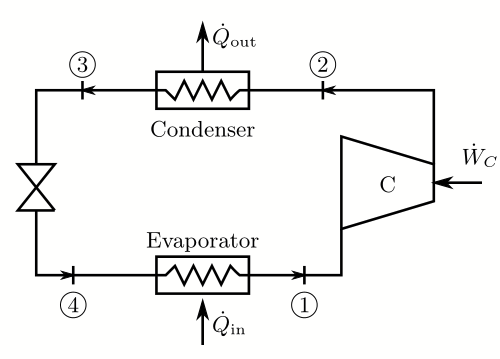

## Solution


### Python Initialization
We'll start by importing the libraries we will use for our analysis and initializing dictionaries to hold the properties we will be usings.

In [1]:
from kilojoule.templates.default import *
   
r134a = realfluid.Properties('R134a')

/opt/anaconda/lib/python3.8/site-packages/mpmath/ctx_mp_python.py:892: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if other is 0:
/opt/anaconda/lib/python3.8/site-packages/mpmath/ctx_mp_python.py:986: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if other is 0:


### Given Parameters
We now define variables to hold our known values.

In [2]:
p[1] = Quantity(2.4,'bar')   # Compressor inlet pressure
T[1] = Quantity(0,'degC')    # Compressor inlet temperature
Vdot[1] = Quantity(0.6,'m^3/min') # Compressure inlet volumetric flow rate
p[2] = Quantity(9,'bar')     # Compressor outlet pressure
T[2] = Quantity(60,'degC')   # Compressor outlet temperature
x[3] = 0                     # Condenser outet quality

display.Summary(locals());

<IPython.core.display.Latex object>

,T,p,x,Vdot
unit,°C,kPa,,m³/s
1,0,240,-,0.01
2,60,900,-,-
3,-,-,0,-


### Assumptions
- Non-ideal work devices
- Saturated liquid at condenser exit
- Isobaric heat exchangers
- Negligible changes in kinetic energy
- Negligible changes in potential energy

In [3]:
p[4] = p[1]
p[3] = p[2]

display.Summary(locals());

<IPython.core.display.Latex object>

,T,p,x,Vdot
unit,°C,kPa,,m³/s
1,0,240.0,-,0.01
2,60,900.0,-,-
3,-,900.0,0,-
4,-,240.0,-,-


### (a) Power input to the compressor

In [4]:
#### Mass flow rate
v[1] = r134a.v(T[1],p[1])
mdot = Vdot[1]/v[1]

#### 1st Law for compressor
h[1] = r134a.h(T[1],p[1])
h[2] = r134a.h(T[2],p[2])
w_in = h[2]-h[1]
Wdot_in = mdot*w_in

display.Calculations(locals(),comments=True);

### Mass flow rate

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### 1st Law for compressor

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### (b) Heating Capacity

In [5]:
#### Heat output
h[3] = r134a.h(p[3],x[3])
q_out = h[2]-h[3]
Qdot_out = mdot*q_out

display.Calculations(locals(), comments=True);

### Heat output

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### (c) $COP_{HP}$

In [6]:
COP_HP = Qdot_out/Wdot_in

display.Calculations(locals());

<IPython.core.display.Latex object>

### (d) Compressor isentropic efficiency

In [7]:
# Isentropic exit state
s[1] = r134a.s(T[1],p[1])
s['2s'] = s[1]
h['2s'] = r134a.h(p[2],s[1])

# Isentropic efficiency
eta_c = (h['2s']-h[1])/(h[2]-h[1])

display.Calculations(locals(),comments=True);

 Isentropic exit state

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 Isentropic efficiency

<IPython.core.display.Latex object>

### Diagrams

In [8]:
# Remaining properties
h[4] = h[3]
for i in [1,2,3,4,'2s']:
    states.fix(i, r134a)
states.display()

,T,p,v,u,h,s,x,phase,Vdot
unit,°C,kPa,m³/kg,kJ/kg,kJ/kg,kJ/K/kg,,,m³/s
1,0.000000,240.0,0.086170,379.432445,400.113255,1.747534,-,gas,0.01
2,60.000000,900.0,0.026146,419.745099,443.276423,1.793220,-,"unknown: This pair of inputs [HmassT_INPUTS] is not yet supported : PropsSI(""Phase"",""T"",333.15,""H"",443276.4226,""R134a"")",-
2s,45.688005,900.0,0.024206,406.601832,428.386931,1.747534,-,gas,-
3,35.526110,900.0,0.000858,249.007500,249.779795,1.169479,0,twophase,-
4,-5.365325,240.0,0.024132,243.988164,249.779795,1.186310,0.281077,twophase,-


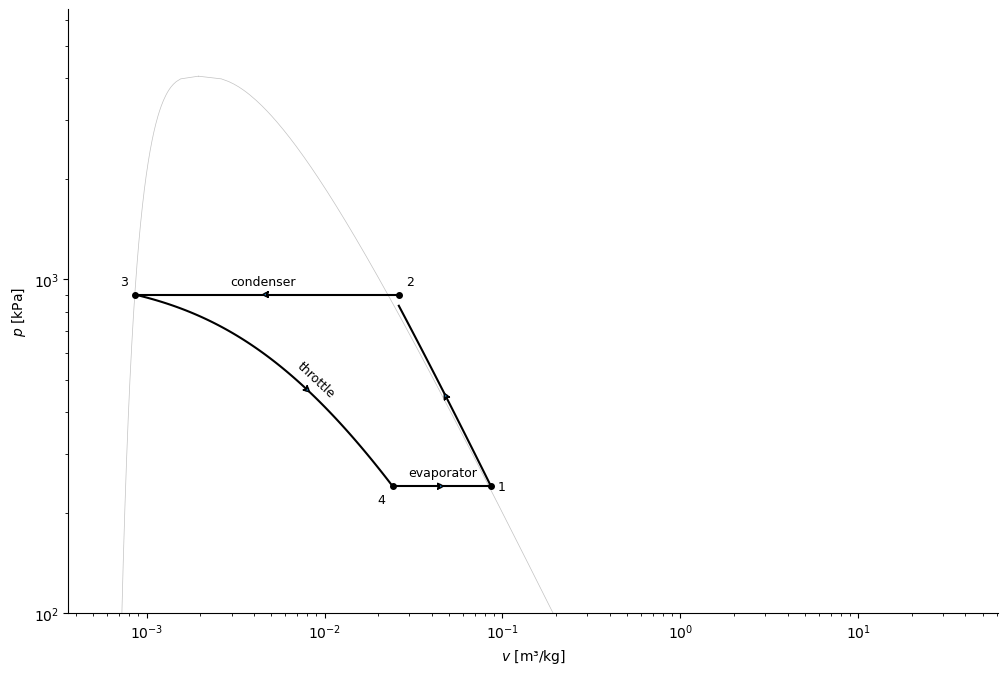

In [13]:
pv = r134a.pv_diagram()
pv.ax.set_ylim(bottom=Quantity(100,'kPa'))

pv.plot_state(states[1],label_loc='east')
pv.plot_state(states[2],label_loc='north east')
pv.plot_state(states[3],label_loc='north west')
pv.plot_state(states[4],label_loc='south west')
    
pv.plot_process(states[1],states[2],path='isentropic')
pv.plot_process(states[2],states[3],path='isobaric', label='condenser')
pv.plot_process(states[3],states[4],path='isenthalpic', label='throttle')
pv.plot_process(states[4],states[1],path='isobaric', label='evaporator',);

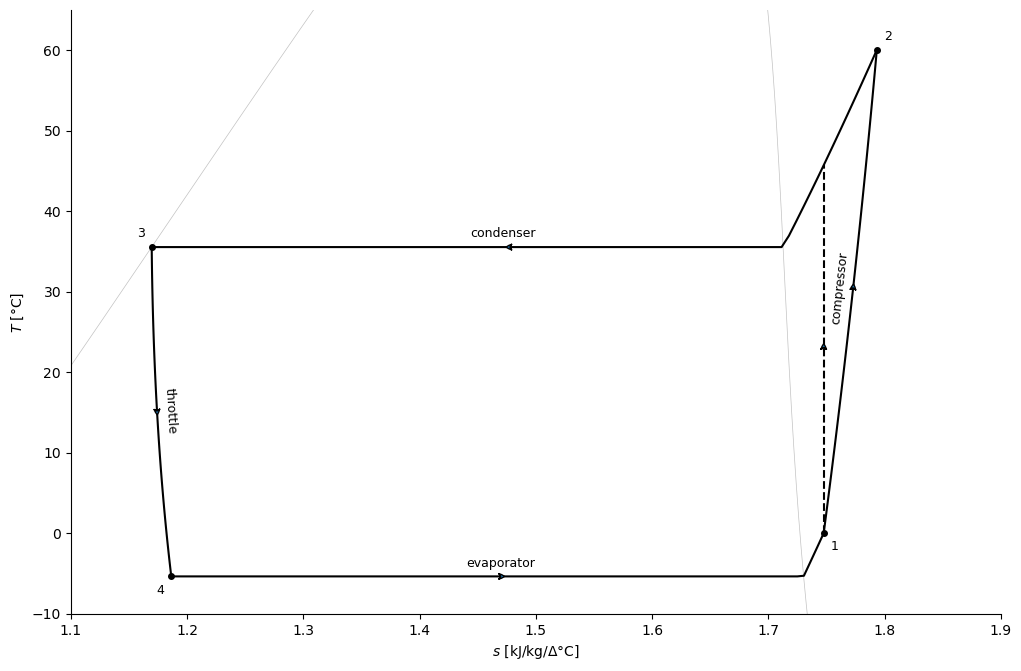

In [21]:
Ts = r134a.Ts_diagram()
Ts.ax.set_ylim(bottom=-10,top=65)
Ts.ax.set_xlim(left=1.1,right=1.9)


Ts.plot_state(states[1],label_loc='south east')
Ts.plot_state(states[2],label_loc='north east')
Ts.plot_state(states[3],label_loc='north west')
Ts.plot_state(states[4],label_loc='south west')
    
Ts.plot_process(states[1],states[2],path='nonideal',label='compressor')
Ts.plot_process(states[1],states['2s'],path='isentropic',linestyle='dashed')
Ts.plot_process(states[2],states[3],path='isobaric',label='condenser')
Ts.plot_process(states[3],states[4],path='isenthalpic',label='throttle')
Ts.plot_process(states[4],states[1],path='isobaric',label='evaporator');